**Importando as Bibliotecas Necessárias**

In [16]:
import numpy as np #Algebra Linear
import pandas as pd #Analise de Dados
import matplotlib.pyplot as plt #Visualização dos Dados
import seaborn as sns #Visualização dos Dados
import plotly as py #Visualização dos Dados
import plotly.graph_objs as go #Visualização dos Dados
from sklearn.cluster import KMeans #Algoritmo de Machine Learning

#Conectar o Notebook a biblioteca Plotly
py.offline.init_notebook_mode(connected = True)

#Configurando tamanho padrao para o plot de figuras
%config InlineBackend.rc={'figure.figsize': (15, 7)}

**Importando os Dados**

In [17]:
#Criando um Dataframe com Pandas
df = pd.read_csv("../input/Mall_Customers.csv")

#Mostrando uma amostra de 10 linhas do Datafame
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
5,6,Female,22,17,76
155,156,Female,27,78,89
50,51,Female,49,42,52
178,179,Male,59,93,14
30,31,Male,60,30,4
56,57,Female,51,44,50
143,144,Female,32,76,87
114,115,Female,18,65,48
31,32,Female,21,30,73
179,180,Male,35,93,90


In [18]:
#Analisando tamanho do Dataset
df.shape

(200, 5)

In [19]:
#Deletando a coluna CustomerID que não será usada na análise
del df['CustomerID']

**Analisando os Dados do Dataframe
**


In [20]:
#Resumo de principais estatísticas sobre o Dataset
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [21]:
#Resumo das informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [22]:
#Analisando a Quantidade de Informações Vazias/Nulas por Coluna
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
#Verificando a existencia de valores nulos (Mesma coisa que o anterior)
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



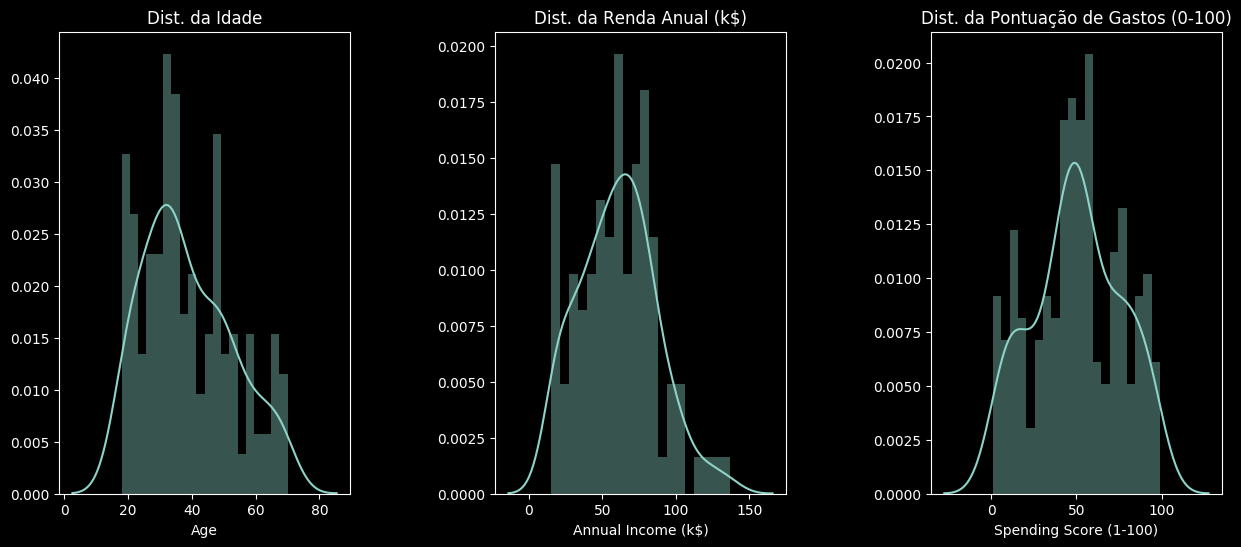

In [24]:
#Analisando as Distribuições dos Atributos

#Mudando Layout de Visualização
plt.style.use('dark_background')

plt.figure(1 , figsize = (15 , 6))

n = 0

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    
    if x == 'Age':
        w = 'Idade'
    
    elif x == 'Annual Income (k$)':
        w = 'Renda Anual (k$)'
    
    else:
        w = 'Pontuação de Gastos (0-100)'
    
    plt.title('Dist. da {}'.format(w))

plt.show()

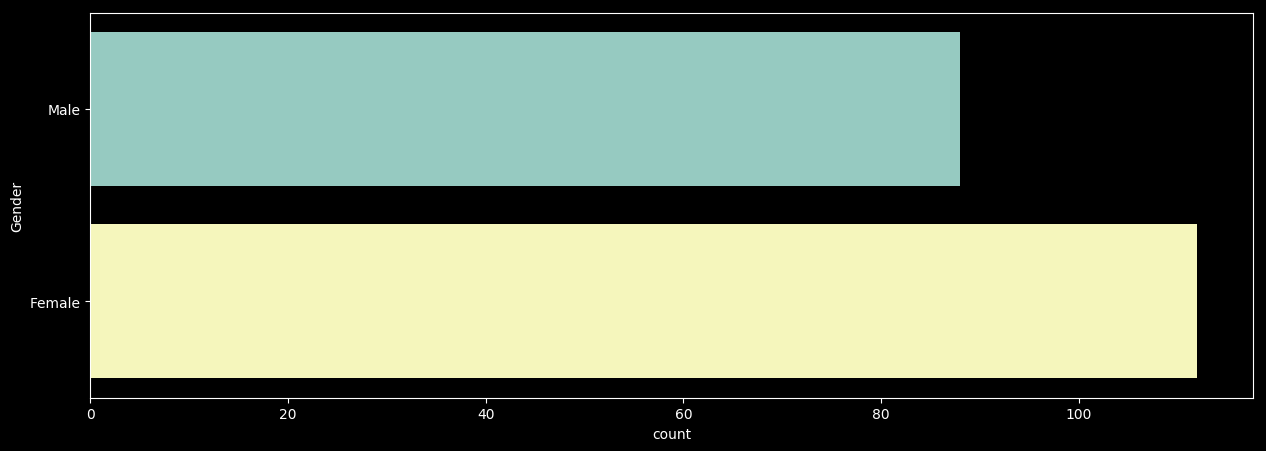

In [25]:
#Proporção de Homem e Mulher no Dataset

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

**Correlações entre features**

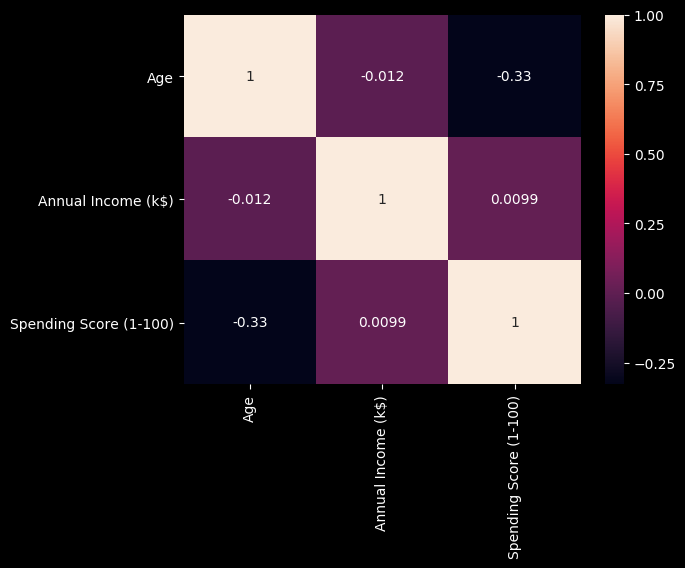

In [26]:
#Analisar Correlação entre as diferentes features

df.corr()
sns.heatmap(df.corr(), annot=True)

plt.show()

Ao Analisar, nota-se que não há grande correlação entre as features para aplicar redução ou transformação de atributos

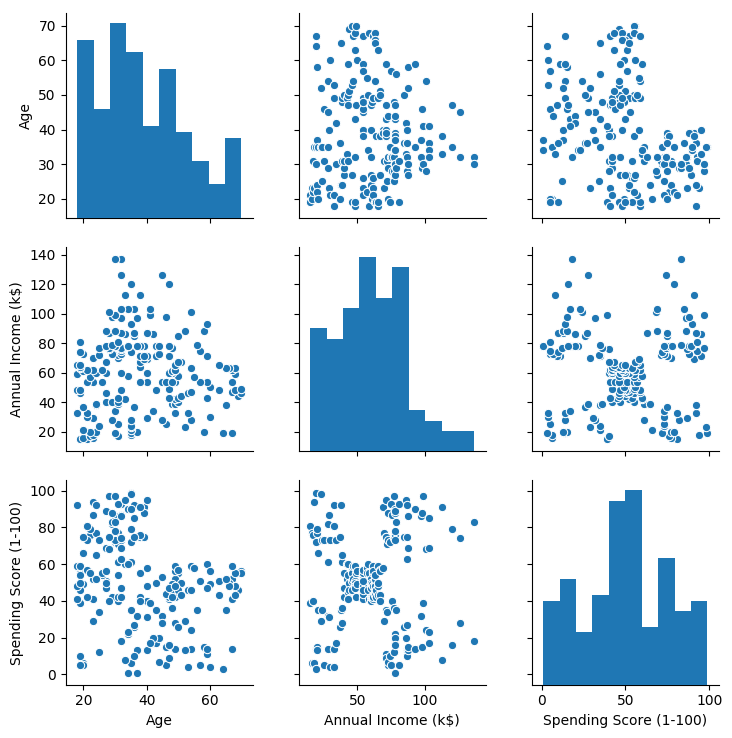

In [27]:
#Mudando Layout de Visualização
plt.style.use('default')

# Plotando as features Duas por vez:
sns.pairplot(df)

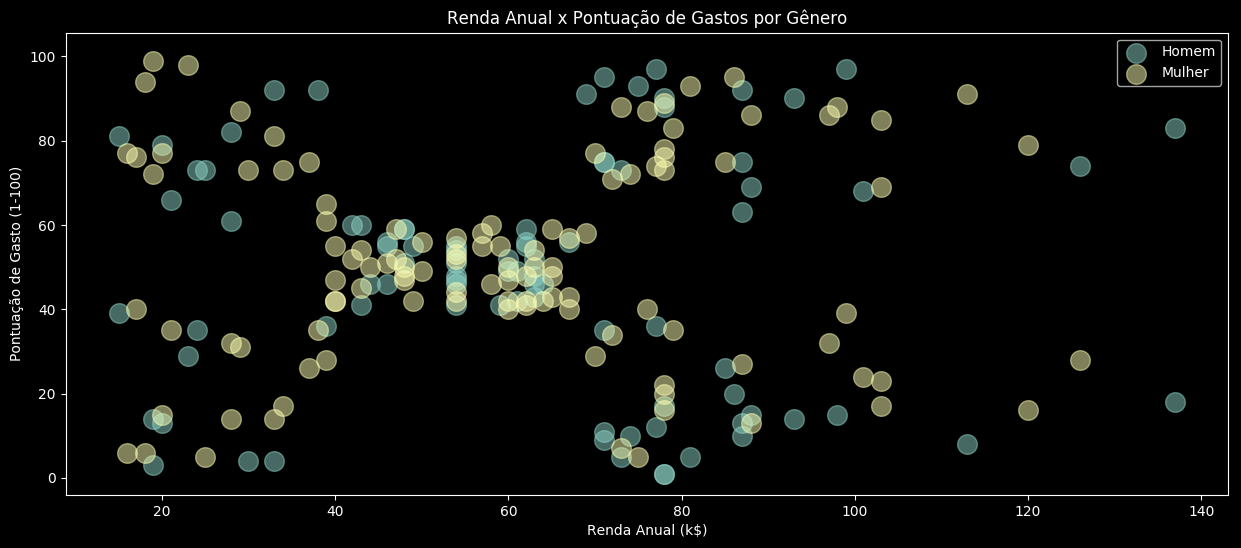

In [28]:
#Mudando Layout de Visualização
plt.style.use('dark_background')

#Analisando mais especificamente Renda Anual x Pontuação de Gastos para Segmentar clientes, divididos por Gênero
plt.figure(1 , figsize = (15 , 6))

for gender in ['Male', 'Female']:
    
    if gender == 'Male':
        gen = "Homem"
    
    else:
        gen = "Mulher"

    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' , 
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gen)

plt.xlabel('Renda Anual (k$)'), plt.ylabel('Pontuação de Gasto (1-100)')
plt.title('Renda Anual x Pontuação de Gastos por Gênero')
plt.legend()

plt.show()

#Ao visualizar, nota-se que não há grande segmentação por Gênero nessa análise

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



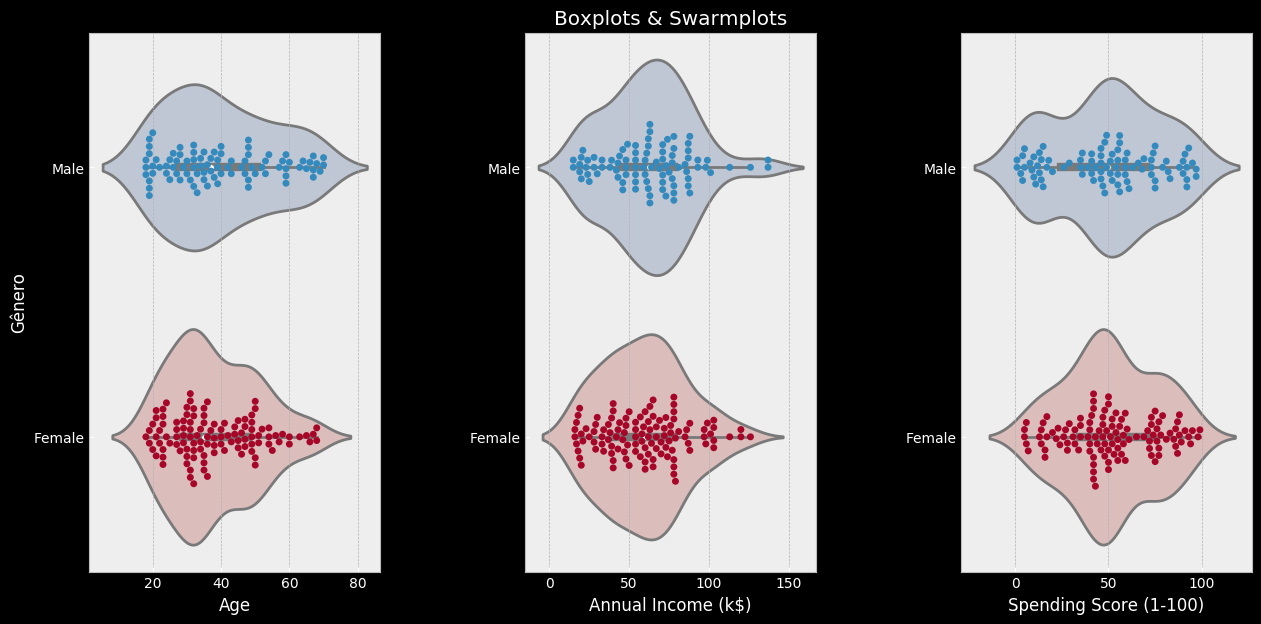

In [29]:
#Criando Boxplots e Swarmplots das Features

#Mudando Layout de Visualização
plt.style.use('bmh')

plt.figure(1 , figsize = (15 , 7))
n = 0

for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gênero' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

plt.show()

#Analisamos algumas estatísticas, como média, quartils e moda dos dados
#Mulheres no Dataset que possuem alta renda anual estão em menor quantidade comparando com Homens do Dataset
#A pontuação de gastos é bem distribuída entre os dois Gêneros

Analisamos algumas estatísticas, como média, quartils e moda dos dados.

Mulheres no Dataset que possuem alta renda anual estão em menor quantidade comparando com Homens do Dataset.

A pontuação de gastos é bem distribuída entre os dois Gêneros.

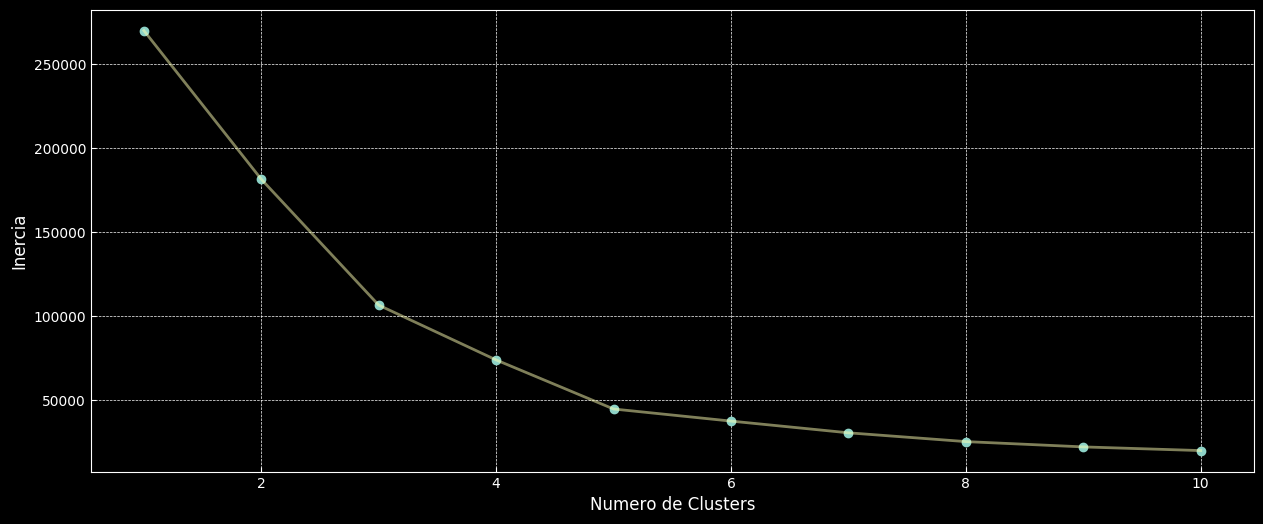

In [30]:
#KMEANS - 2 Atributos (2D)

#Segmentação Usando Renda Anual e Pontuacão de Gastos

#Verificando o Método do Cotovelo para o número k de clusters

#Mudando Layout de Visualização
plt.style.use('dark_background')

X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []

for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
    tol=0.0001, random_state= 111 , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de Clusters') , plt.ylabel('Inercia')

plt.show()

Ao analisar o gráfico, nota-se que a partir de 5 clusters, a função de Inércia se estabiliza.

Assim, o número ideal de clusters para esse caso é 5.

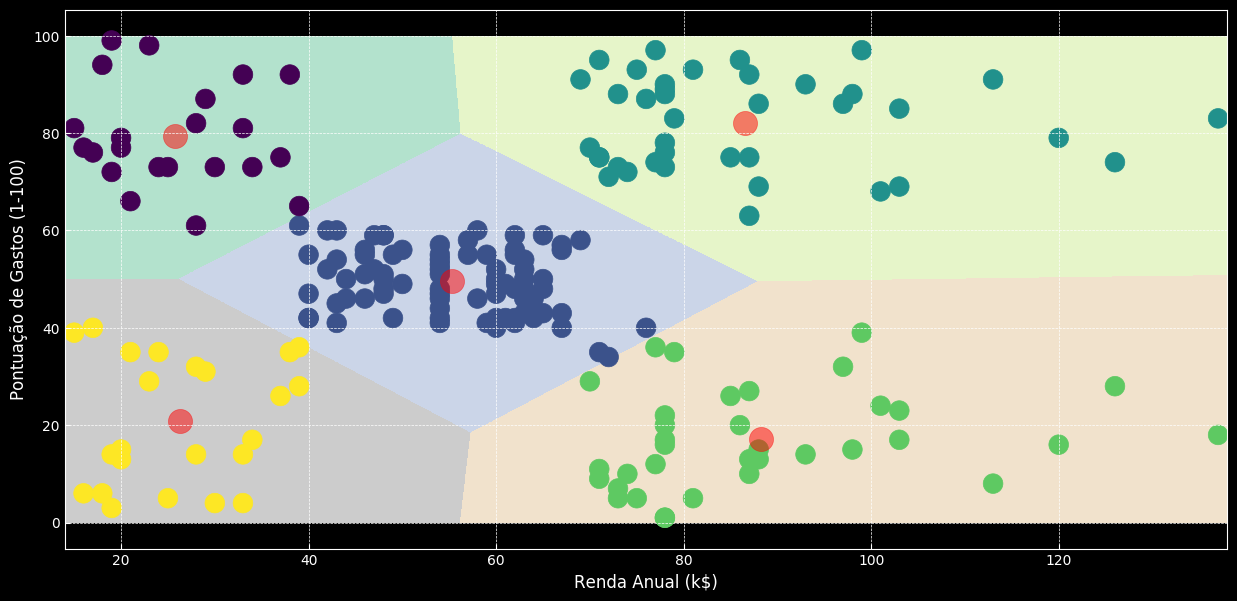

In [31]:
#Mudando Layout de Visualização
#plt.style.use('fivethirtyeight')

#Montando e configurando o Algoritmo para 5 clusters
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001, random_state= 111 , algorithm='elkan') )
algorithm.fit(X2)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
h = 0.02

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()

Z2 = Z2.reshape(xx.shape)

plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,s = 200 )
plt.scatter(x = centroids2[: , 0] , y = centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Pontuação de Gastos (1-100)') , plt.xlabel('Renda Anual (k$)')
plt.show()

#Com isso obtemos uma boa segmentação dos dados para nomear os tipos de clientes do Shopping

Com isso obtemos uma boa segmentação dos dados para nomear os tipos de clientes do Shopping.

**Isso pode ser usado em campanhas de marketing**

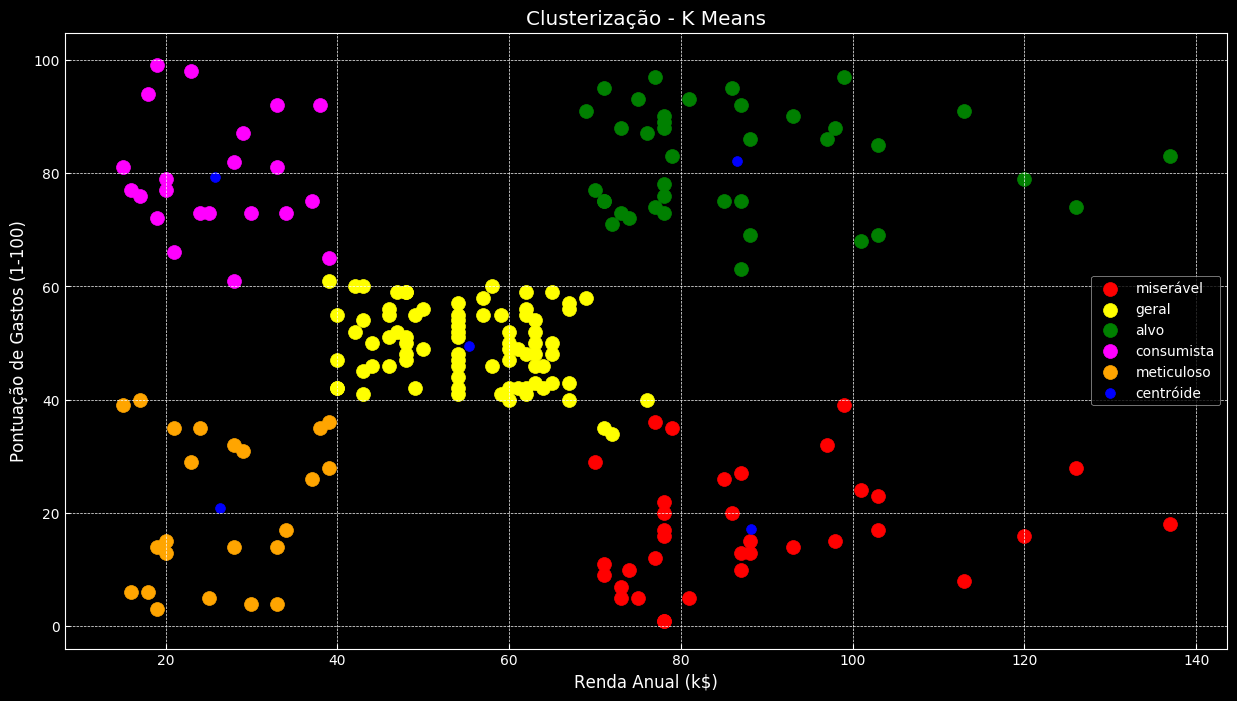

In [32]:
# Plotando os Clusters (2D)

#X pega apenas Renda e Gastos
x = df.iloc[:, [2, 3]].values

#Executando Algoritmo Novamente
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Criando Figura e configurando tamanho
plt.figure(figsize=(15, 8))

#Nomeando os Clusters
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miserável')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'geral')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'alvo')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'consumista')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'meticuloso')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centróide')


#Plotando a Análise Final
plt.title('Clusterização - K Means')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend()
plt.show()